<br>

## Final project preliminaries

<font color="Teal"><b>Exploring how much an idea "pushes back" - including its technologies, libraries, and online resources ...</b></font>



<br>

#### Here are the  [cs35 project guidelines](https://docs.google.com/document/d/1DwoOJCy6GGECvzSOE4BDPVcEgVtvChglnz03-uxx7mA/edit)  with more details.

And here is the [Colab version](https://colab.research.google.com/drive/1kASM8K0vqu40S5xjBS-hXf-bIDcQPZtz#scrollTo=1gAMoA_KN5L0) of this notebook. If Colab works better for your project, wonderful!

<br>


#### **What you've tried**
+ What are the things you've tried <b><u>so far</u></b> - and how has it gone?  
  + This is the most important effort!  
  + <b>Note</b>: If you have _lots_ of ideas and can't decide... look for online guides or walkthroughs for several of them and see which are most promising (and interesting!)
  + include, here in the Python cells above/below, the explorations and/or experiments you've pursued
  + if you're using plain-python files or other notebook files, submit those, in addition or instead
    + <font size="-2">if you submit other files instead, include these reflections in the files you submit...</font>
  + include any other <i>small</i> data files/links/resources you've collected
<br>
<br>

#### **Your Project Plan,** <font size="-1">as of this moment...</font>

+ <b><font color="DodgerBlue">Share</font></b> a paragraph or so on your project exploration so far -- and your summary of the idea/plan + its background
  + This is intentionally ***progress-first***
  + **Try things out** before dedicating too much to a single, specific path...

  I have looked through and run example code from scikit-image that displays microscopy images, segments nuceli within cells and quantifies colocalization of two cellular components using varying metrics. I have applied this knowledge to my own data from research I conducted this summer, looking at multi-dimensional nd2 images which have a number of fluorescence channels and fields of view. I have successfully displayed individual channels from fluorescence images and overlayed two channels to look at colocalization. In addition, I have worked at looking into ways to adjust image contrast and thresholding in order to improve segmentation of nuclei and proteins/nucelic acids in my own images. I successfully ran code to segment nuclei on my own images. 

  The summary of my goal for my project is to explore what I can do using scikit-image to analyze example fluorescence images that I have from reserach I conducted this summer. My total goals will be to adjust thresholding of images, segment cells/nuclei, count cells in larger image with many cells, and display and quantify colocalization. This project connects most closely to our work in class on data visualization, so along with the data visualization involved in just processing and displaying image data in plots, I would like to create additional plots comparing the colocalization quantifications that I will perform. 


+ <b><font color="Coral">Share</font></b>: &nbsp; What resources/libraries/walkthroughs have you found?

The main libraries I will be using here are scikit-image, matplotlib, nd2 and numpy. 

Here are a number of resources from scikit-image which may be helpful for looking into colocalization, cell/nuclei segmentation and thresholding. 

https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_colocalization_metrics.html#sphx-glr-auto-examples-applications-plot-colocalization-metrics-py
https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_watershed.html#sphx-glr-auto-examples-segmentation-plot-watershed-py
https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_fluorescence_nuclear_envelope.html
https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_human_mitosis.html
https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_thresholding_guide.html

+ <b><font color="Coral">Share</font></b>: &nbsp; What datasets are you using? <font size="-1">if applicable for your project</font>

I will be using my own data from this summer looking at fluorescence images of cells which include channels for brightfield images, a nuclear stain, fluorescent DNA, and fluorescent protein cargo of two types. These are nd2 files. 

<br>
<br>

#### **Looking ahead**
+ Specifically, what task do you plan to try <b><u>next</u></b>?
+ More generally, how do you plan to go _beyond_ existing resources...
  + If it's not shared above, describe how you envision _personalizing_ and/or _individualizing_ your project...

  I plan to continue working on thresholding images to improve segmentation. Once this is done I will be able to work towards quantification of colocalization using my images. 

  I plan to go beyond existing resources by combining the resources I have found from scikit-image with the nd2 library, as the nd2 fluorescence image datatype is not the data form of these examples. In addition, I hope to go beyond merely displaying images by creating several figures of my own that will quantify the colocalization of the various fluorescent compounds in my images. 

  This project is individualized to me as I am using my own data from this summer which I had not previously been able to analyze using Python, just display. 

<br><br>
<hr>
<br><br>

Feel free to use this notebook to summarize your prelimiaries so far ...

<br>

... ***or*** &nbsp;&nbsp; include your responses to these questions in other  notebooks or plain-python files!

<br><br>
<hr>
<br><br>

In [ ]:
#
#  Feel free to interleave markdown or plain-text throughout...
#
#       If your project doesn't work well with notebooks, plain-python is 100% ok.
#

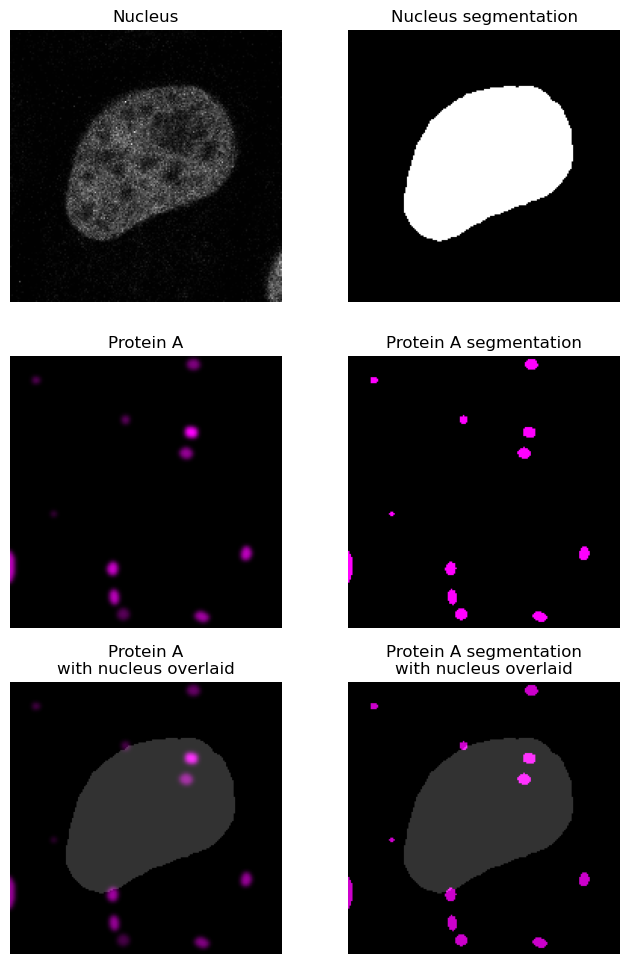

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy import ndimage as ndi
import skimage as ski
import pooch

rng = np.random.default_rng()

# segment nucleus
nucleus = ski.data.protein_transport()[0, 0, :, :180]
smooth = ski.filters.gaussian(nucleus, sigma=1.5)
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)

# protein blobs of varying intensity
proteinA = np.zeros_like(nucleus, dtype="float64")
proteinA_seg = np.zeros_like(nucleus, dtype="float64")

for blob_seed in range(10):
    blobs = ski.data.binary_blobs(
        180, blob_size_fraction=0.5, volume_fraction=(50 / (180**2)), rng=blob_seed
    )
    blobs_image = ski.filters.gaussian(blobs, sigma=1.5) * rng.integers(50, 256)
    proteinA += blobs_image
    proteinA_seg += blobs

# plot data
fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey=True)
ax[0, 0].imshow(nucleus, cmap=plt.cm.gray)
ax[0, 0].set_title('Nucleus')

ax[0, 1].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[0, 1].set_title('Nucleus segmentation')

black_magenta = LinearSegmentedColormap.from_list("", ["black", "magenta"])
ax[1, 0].imshow(proteinA, cmap=black_magenta)
ax[1, 0].set_title('Protein A')

ax[1, 1].imshow(proteinA_seg, cmap=black_magenta)
ax[1, 1].set_title('Protein A segmentation')

ax[2, 0].imshow(proteinA, cmap=black_magenta)
ax[2, 0].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
ax[2, 0].set_title('Protein A\nwith nucleus overlaid')

ax[2, 1].imshow(proteinA_seg, cmap=black_magenta)
ax[2, 1].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
ax[2, 1].set_title('Protein A segmentation\nwith nucleus overlaid')

for a in ax.ravel():
    a.set_axis_off()

In [2]:
ski.measure.intersection_coeff(proteinA_seg, nucleus_seg)

0.22

In [3]:
ski.measure.manders_coloc_coeff(proteinA, nucleus_seg)

0.269511913988304

Text(0, 0.5, 'Protein B intensity')

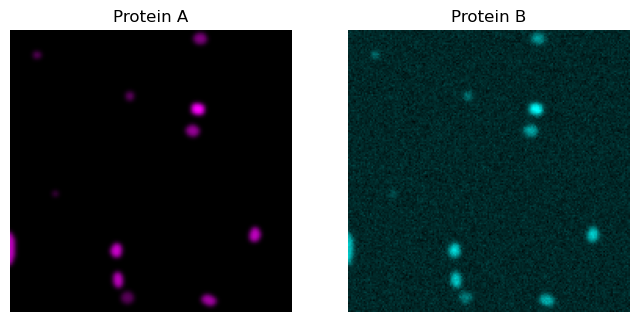

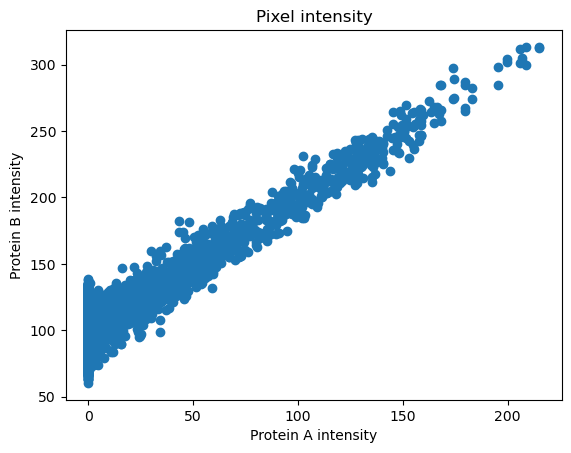

In [4]:
# generating protein B data that is correlated to protein A for demo
proteinB = proteinA + rng.normal(loc=100, scale=10, size=proteinA.shape)

# plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

ax[0].imshow(proteinA, cmap=black_magenta)
ax[0].set_title('Protein A')

black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1].imshow(proteinB, cmap=black_cyan)
ax[1].set_title('Protein B')

for a in ax.ravel():
    a.set_axis_off()

# plot pixel intensity scatter
fig, ax = plt.subplots()
ax.scatter(proteinA, proteinB)
ax.set_title('Pixel intensity')
ax.set_xlabel('Protein A intensity')
ax.set_ylabel('Protein B intensity')

In [5]:
pcc, pval = ski.measure.pearson_corr_coeff(proteinA, proteinB)
print(f"PCC: {pcc:0.3g}, p-val: {pval:0.3g}")

PCC: 0.814, p-val: 0


In [9]:
import itertools
from pathlib import Path
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nd2
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")

In [ ]:
conditions = [
    #"07_19_TFX_dextran_transferrin",
    "07_19_TFX_dextran_transferrin_40x"
]

im_pool = dict()
fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]
]

for i, cond in enumerate(tqdm(conditions)):
    im_file = list(dir.glob(f"{cond}.nd2"))[0]
    with nd2.ND2File(im_file) as im:
        im = np.array(im)
        print(im.shape)
        im_pool[cond + "_DMSO"] = [np.array(im[fovs[i][0], j])[950:1100, 1150:1300] for j in range(0, 5)]
        im_pool[cond + "_Okanin"] = [np.array(im[fovs[i][1], j])[670:820, 300:450] for j in range(0, 5)]
        im_pool[cond + "_SalB"] = [np.array(im[fovs[i][2], j])[600:750, 150:300] for j in range(0, 5)] #50:200, 0:150
        im_pool[cond + "_EIPA"] = [np.array(im[fovs[i][3], j])[400:550, 425:575] for j in range(0, 5)]
        im_pool[cond + "_LatA"] = [np.array(im[fovs[i][4], j])[325:475, 375:525] for j in range(0, 5)]

100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

(10, 5, 1140, 1570)
5
150


Loaded image with shape: (10, 5, 1140, 1570)


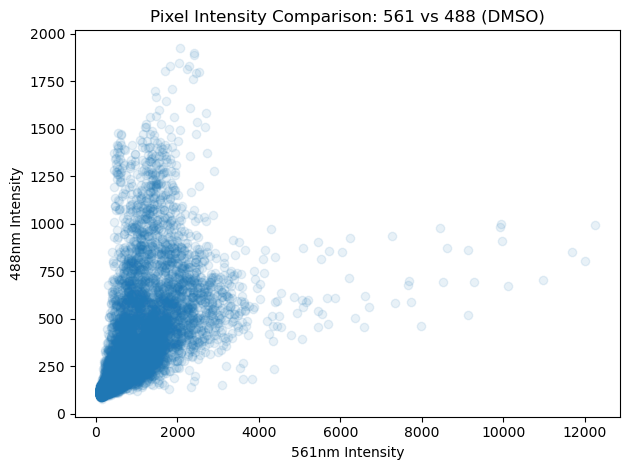

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import nd2
from pathlib import Path
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    print(f"Loaded image with shape: {im.shape}")
    
    # Extract different channels from the ND2 image for DMSO
    # You will need to adjust the channel indexing based on the structure of your ND2 file
    # Assuming the channels are organized in the second dimension (axis=1)
    
    # Example: extracting channels 0, 1, 2 (assuming red, green, blue)
    # Adjust the slicing based on your ND2 data structure
    im_pool["DMSO_brightfield"] = [np.array(im[fovs[0], 0])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_561"] = [np.array(im[fovs[0], 1])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_405"] = [np.array(im[fovs[0], 2])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_488"] = [np.array(im[fovs[0], 3])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_640"] = [np.array(im[fovs[0], 4])[950:1100, 1150:1300] for fov in fovs]

# Plot the color channels
fig, ax = plt.subplots(3, 2, figsize=(10, 12), sharey=True)

# Plot Red, Green, and Blue channels for DMSO
ax[0, 0].imshow(im_pool["DMSO_brightfield"][0], cmap='gray')  # Using 'Reds' colormap for the red channel
ax[0, 0].set_title('DMSO Brightfield')

ax[0, 1].imshow(im_pool["DMSO_561"][1], cmap='inferno')  # Using 'Greens' colormap for the green channel
ax[0, 1].set_title('DMSO FluorOligo 561 nm ')

ax[1, 0].imshow(im_pool["DMSO_405"][2], cmap='inferno')  # Using 'Blues' colormap for the blue channel
ax[1, 0].set_title('DMSO Hoechst 405 nm')

ax[1, 1].imshow(im_pool["DMSO_488"][2], cmap='magma')  # Using 'Blues' colormap for the blue channel
ax[1, 1].set_title('DMSO Dextran 488 nm')

ax[2, 0].imshow(im_pool["DMSO_640"][2], cmap='viridis')  # Using 'Blues' colormap for the blue channel
ax[2, 0].set_title('DMSO Transferrin 640 nm')

# Example: Overlay all three channels (RGB) for DMSO
ax[2, 1].imshow(im_pool["DMSO_561"][1], cmap='magma')
#ax[2, 1].imshow(im_pool["DMSO_405"][2], cmap='Blues', alpha=0.5)
ax[2, 1].imshow(im_pool["DMSO_488"][3], cmap='viridis', alpha=0.5)
#ax[2, 1].imshow(im_pool["DMSO_640"][4], cmap='Oranges', alpha=0.5)
ax[2, 1].set_title('DMSO RGB Overlay - FOV 0')

# Optionally, add more FOVs or adjust for other visualizations
for a in ax.ravel():
    a.set_axis_off()

# Scatter Plot for Colocalization between Red, Green, and Blue channels (DMSO)
fig, ax = plt.subplots()

pink_channel = np.array(im_pool["DMSO_561"][1]).flatten()
blue_channel = np.array(im_pool["DMSO_405"][2]).flatten()
green_channel = np.array(im_pool["DMSO_488"][3]).flatten()
orange_channel = np.array(im_pool["DMSO_640"][3]).flatten()

# Scatter Plot comparing two channels (e.g., Red vs Green)
ax.scatter(pink_channel, green_channel, alpha=0.1, label="561 vs 488")
ax.set_title('Pixel Intensity Comparison: 561 vs 488 (DMSO)')
ax.set_xlabel('561nm Intensity')
ax.set_ylabel('488nm Intensity')

plt.tight_layout()
plt.show()

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from skimage import exposure, color


def multimshow(
    im_pool,
    adjust_thresh,
    chans,
    ch_to_lut,
    nrows,
    ncols,
    show_multi_chan=False,
    text_locs=None,
    texts=None,
    text_colors=None,
    fontsize=32,
    xlabels=None,
    ylabels=None,
    adjust_to_first_im=[True, True],
    mixing_factor=[1, 1],
    order="C",
    merge=True,
    brightness_exclude=None,
):
    # Create figure and axis
    fig, ax = plt.subplots(nrows, ncols, figsize=(8 * ncols, 8 * nrows))
    plt.subplots_adjust(hspace=0.03, wspace=0.03)
    fig.set_facecolor("black")

    if nrows == 1:
        ax = np.expand_dims(ax, axis=0)

    if ncols == 1:
        ax = np.expand_dims(ax, axis=1)

    for a in ax.flatten():
        a.axis("off")

    count = 0
    vmin, vmax = [2**16] * len(chans), [0] * len(chans)

    # Calculate exposure limits
    for i, ch in enumerate(chans):
        if not adjust_to_first_im[i]:
            break
        for j, well in enumerate(im_pool.keys()):
            if j in brightness_exclude:
                continue
            im = im_pool[well][ch]
            v1, v2 = np.percentile(im, adjust_thresh[i])
            if v1 < vmin[i]:
                vmin[i] = v1
            if v2 > vmax[i]:
                vmax[i] = v2

    # Create adjusted images
    for j, well in enumerate(im_pool.keys()):
        im_stack = im_pool[well]
        im_rgb = np.dstack([np.zeros_like(im_stack[0])] * 3).astype(np.float64)
        for i, ch in enumerate(chans):
            im = im_stack[ch]
            im_single_chan = np.dstack([np.zeros_like(im)] * 3).astype(np.float64)
            if adjust_to_first_im[i]:
                im_ad = exposure.rescale_intensity(im.astype(np.float64), in_range=(vmin[i], vmax[i]))
                if im_ad.max() > 1:
                    im_ad = im_ad / vmax[i]
            else:
                v1, v2 = np.percentile(im, adjust_thresh[i])
                im_ad = exposure.rescale_intensity(im, in_range=(v1, v2))
                im_ad = im_ad / im_ad.max()
            lut = ch_to_lut[ch]
            if type(lut) is list:
                im_single_chan[:, :, lut] += np.dstack([im_ad] * len(lut))
            else:
                im_single_chan[:, :, lut] += im_ad
            im_rgb += im_single_chan
            if show_multi_chan == "row":
                ax[i, j].imshow(im_single_chan)
            elif show_multi_chan == "column":
                ax[j, i].imshow(im_single_chan)
        im_rgb = im_rgb / np.max(im_rgb)
        if not show_multi_chan:
            ax.flatten(order=order)[j].imshow(im_rgb, aspect=1)
        else:
            if merge:
                if show_multi_chan == "row":
                    ax[len(chans), j].imshow(im_rgb, aspect=1)
                elif show_multi_chan == "column":
                    ax[j, len(chans)].imshow(im_rgb, aspect=1)
        count += 1

    # Add text
    if texts is not None:
        for loc, text, textcolor in zip(text_locs, texts, text_colors):
            ax[0, 0].text(
                loc[0],
                loc[1],
                text,
                color=textcolor,
                transform=ax[0, 0].transAxes,
                fontsize=fontsize,
            )

    # Add labels
    if ylabels is not None:
        for i, c in enumerate(ylabels):
            ax[i, 0].text(
                -0.05,
                0.5,
                c,
                transform=ax[i, 0].transAxes,
                fontsize=fontsize,
                rotation=90,
                ha="center",
                va="center",
                color="white",
            )
    if xlabels is not None:
        for i, c in enumerate(xlabels):
            ax[0, i].text(
                0.5,
                1.05,
                c,
                color="white",
                transform=ax[0, i].transAxes,
                fontsize=fontsize,
                ha="center",
                va="center",
            )


def defaultStyle(fs=12):
    plt.rc("font", family="Arial")
    plt.rc("text", usetex=False)
    plt.rc("xtick", labelsize=fs)
    plt.rc("ytick", labelsize=fs)
    plt.rc("axes", labelsize=fs)
    plt.rc("mathtext", fontset="custom", rm="Arial")


def save_fig(fig_id, path="../figures", tight_layout=True, fmt="pdf", dpi=300):
    Path(path).mkdir(parents=True, exist_ok=True)
    fig_path = Path(path) / f"{fig_id}.{fmt}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
        tight = "tight"
    else:
        tight = None
    if fmt == "png":
        plt.savefig(fig_path, format=fmt, dpi=dpi, transparent=False, bbox_inches=tight)
    else:
        plt.savefig(fig_path, format=fmt, transparent=False, bbox_inches=tight)


Loaded image with shape: (10, 5, 1140, 1570)


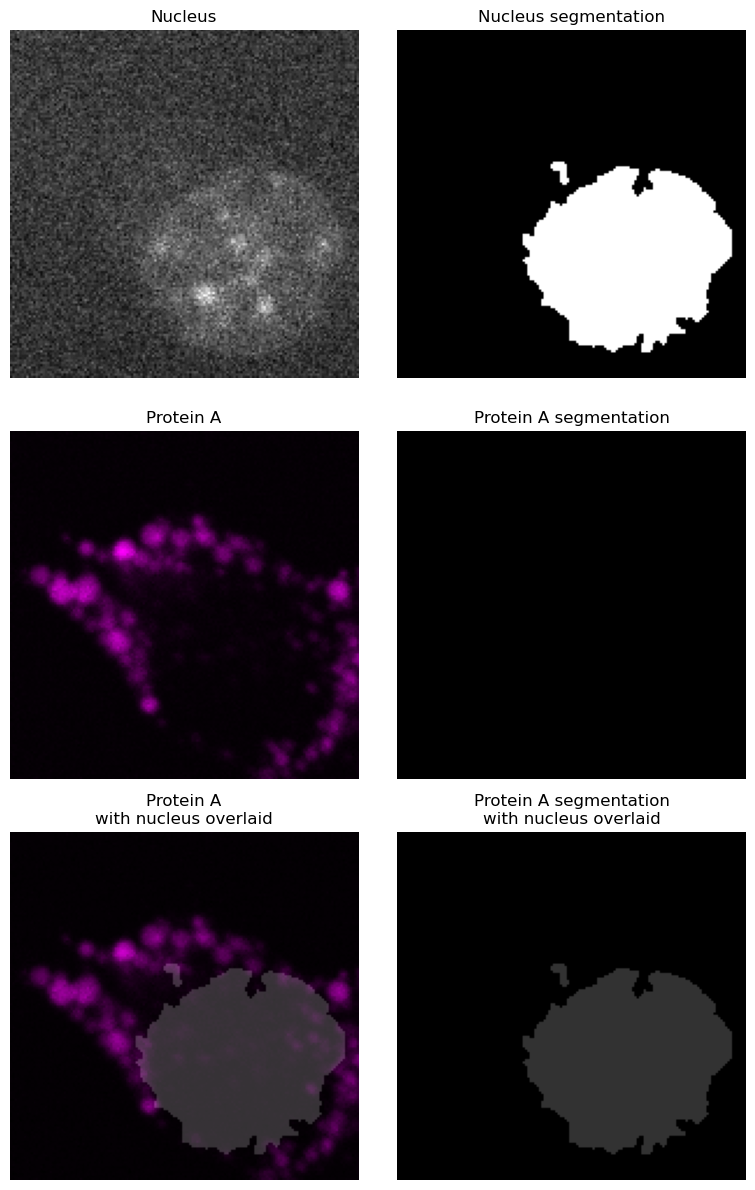

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import scipy.ndimage as ndi
import nd2
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    print(f"Loaded image with shape: {im.shape}")
    
    # Extract the specific FOV and channel (assuming FOVs and channels are in the right dimensions)
    # For example, we are taking the 0th FOV and 0th channel (which could be brightfield)
    nucleus = np.array(im[fovs[0], 2])[950:1100, 1150:1300]  # Extracting a region for nucleus
    
    # Segmentation of the nucleus region
    smooth = ski.filters.gaussian(nucleus, sigma=1.5)
    thresh = smooth > ski.filters.threshold_otsu(smooth)
    fill = ndi.binary_fill_holes(thresh)
    nucleus_seg = ski.segmentation.clear_border(fill)


    # **Use Protein A Data from the ND2 File**
    proteinA = np.array(im[fovs[0], 3])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 2)
    proteinA_seg = np.zeros_like(proteinA, dtype="float64")

    # Plot data
    fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey=True)
    
    # Display Nucleus and Segmentation
    ax[0, 0].imshow(nucleus, cmap=plt.cm.gray)
    ax[0, 0].set_title('Nucleus')

    ax[0, 1].imshow(nucleus_seg, cmap=plt.cm.gray)
    ax[0, 1].set_title('Nucleus segmentation')

    # Display Protein A and Segmentation
    black_magenta = LinearSegmentedColormap.from_list("", ["black", "magenta"])
    ax[1, 0].imshow(proteinA, cmap=black_magenta)
    ax[1, 0].set_title('Protein A')

    ax[1, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[1, 1].set_title('Protein A segmentation')

    # Overlay Nucleus segmentation on Protein A
    ax[2, 0].imshow(proteinA, cmap=black_magenta)
    ax[2, 0].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
    ax[2, 0].set_title('Protein A\nwith nucleus overlaid')

    ax[2, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[2, 1].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
    ax[2, 1].set_title('Protein A segmentation\nwith nucleus overlaid')

    # Turn off axes
    for a in ax.ravel():
        a.set_axis_off()

    plt.tight_layout()
    plt.show()


Adjusted image shape: (150, 150)


(-0.5, 149.5, 149.5, -0.5)

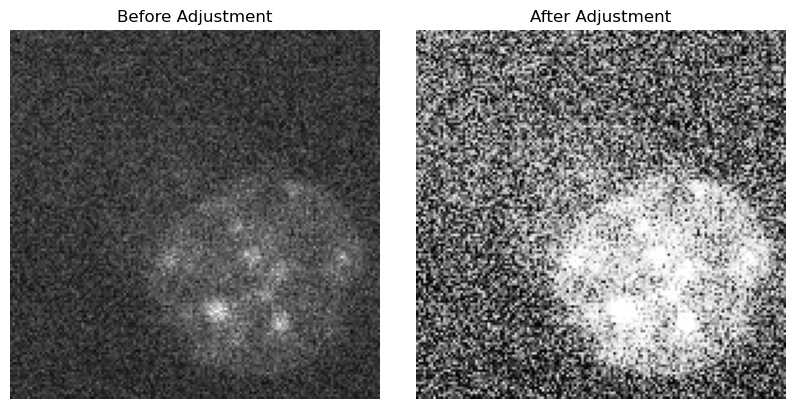

In [77]:
import numpy as np
from skimage import exposure
from pathlib import Path
import nd2  # Make sure the `nd2` module is installed

def adjust_image(im_data, fov, channel, row_slice=None, col_slice=None, adjust_thresh=[2, 98], contrast=False):
    """
    Adjusts the image by applying thresholding and contrast adjustment.
    
    Parameters:
    - im_data: The image data in a NumPy array format (loaded from ND2 file).
    - fov: The field of view to extract.
    - channel: The channel to extract (usually 0 for grayscale).
    - row_slice: Slice object for rows to crop (optional).
    - col_slice: Slice object for columns to crop (optional).
    - adjust_thresh: Threshold for contrast adjustment (default is [2, 98] percentiles).
    - contrast: Boolean to specify whether to apply contrast stretching.
    
    Returns:
    - adjusted_image: The adjusted image as a NumPy array.
    """
    # Extract the image (field of view and channel)
    image = im_data[fov, channel]

    # If row_slice and col_slice are provided, crop the image
    if row_slice and col_slice:
        image = image[row_slice, col_slice]
    elif row_slice:  # Only apply row slicing
        image = image[row_slice]
    elif col_slice:  # Only apply column slicing
        image = image[:, col_slice]

    # Apply threshold adjustment (contrast stretching)
    if adjust_thresh:
        p2, p98 = np.percentile(image, adjust_thresh)
        image = exposure.rescale_intensity(image, in_range=(p2, p98))
    
    # Apply contrast stretching (optional)
    if contrast:
        image = exposure.equalize_hist(image)  # Histological equalization for contrast adjustment
    
    # Return the adjusted image
    return image

# Example usage
conditions = ["07_19_TFX_dextran_transferrin_40x"]
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory

# Load ND2 file for the specified condition
im_file = list(dir.glob(f"{conditions[0]}.nd2"))[0]  # Get the first matching ND2 file

fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]
]

# Open the ND2 file and extract the image data
with nd2.ND2File(im_file) as im:
    # Convert the ND2 file to a NumPy array
    im_data = np.array(im)
    
    # Define row and column slicing parameters
    row_slice = slice(950, 1100)  # Rows 950 to 1100
    col_slice = slice(1150, 1300)  # Columns 1150 to 1300

    # Adjust image (apply thresholding and optional contrast adjustment)
    image_before_adjustment = im_data[fovs[0][0], 2][950:1100, 1150:1300]
    adjusted_image = adjust_image(im_data, fov=fovs[0][0], channel=2, row_slice=row_slice, col_slice=col_slice, contrast=True)
    
    # Display or process the adjusted image as needed
    print(f"Adjusted image shape: {adjusted_image.shape}")
    # Optionally save or visualize the adjusted image here if needed (e.g., using matplotlib)


# Create a figure to show images before and after adjustment
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 5))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Display the image before threshold adjustment
ax[0].imshow(image_before_adjustment, cmap='gray')
ax[0].set_title("Before Adjustment")
ax[0].axis("off")

# Display the adjusted image in the second subplot
ax[1].imshow(adjusted_image, cmap='gray')  # Crop the image for display
ax[1].set_title("After Adjustment")
ax[1].axis("off")


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import scipy.ndimage as ndi
import nd2
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    print(f"Loaded image with shape: {im.shape}")
    
    # Define row and column slicing parameters
    row_slice = slice(950, 1100)  # Rows 950 to 1100
    col_slice = slice(1150, 1300)  # Columns 1150 to 1300

    # Adjust image (apply thresholding and optional contrast adjustment)
    nucleus_before_adjustment = im[fovs[0][0], 0][950:1100, 1150:1300]
    adjusted_nucleus = adjust_image(im, fov=fovs[0][0], channel=0, row_slice=row_slice, col_slice=col_slice, contrast=True)
    
    # Extract the specific FOV and channel (assuming FOVs and channels are in the right dimensions)
    # For example, we are taking the 0th FOV and 0th channel (which could be brightfield)
    nucleus = adjusted_nucleus  # Extracting a region for nucleus
    
    # Segmentation of the nucleus region
    smooth = ski.filters.gaussian(nucleus, sigma=1.5)
    thresh = smooth > ski.filters.threshold_otsu(smooth)
    fill = ndi.binary_fill_holes(thresh)
    nucleus_seg = ski.segmentation.clear_border(fill)

    # Adjust image (apply thresholding and optional contrast adjustment)
    proteinA_before_adjustment = im_data[fovs[0][0], 1][950:1100, 1150:1300]
    adjusted_proteinA = adjust_image(im_data, fov=fovs[0][0], channel=1, row_slice=row_slice, col_slice=col_slice, contrast=True)

    # **Use Protein A Data from the ND2 File**
    proteinA = adjusted_proteinA
    proteinA_seg = np.zeros_like(proteinA, dtype="float64")

    # Plot data
    fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey=True)
    
    # Display Nucleus and Segmentation
    ax[0, 0].imshow(nucleus, cmap=plt.cm.gray)
    ax[0, 0].set_title('Nucleus')

    ax[0, 1].imshow(nucleus_seg, cmap=plt.cm.gray)
    ax[0, 1].set_title('Nucleus segmentation')

    # Display Protein A and Segmentation
    black_magenta = LinearSegmentedColormap.from_list("", ["black", "magenta"])
    ax[1, 0].imshow(proteinA, cmap=black_magenta)
    ax[1, 0].set_title('Protein A')

    ax[1, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[1, 1].set_title('Protein A segmentation')

    # Overlay Nucleus segmentation on Protein A
    ax[2, 0].imshow(proteinA, cmap=black_magenta)
    ax[2, 0].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
    ax[2, 0].set_title('Protein A\nwith nucleus overlaid')

    ax[2, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[2, 1].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
    ax[2, 1].set_title('Protein A segmentation\nwith nucleus overlaid')

    # Turn off axes
    for a in ax.ravel():
        a.set_axis_off()

    plt.tight_layout()
    plt.show()


Loaded image with shape: (10, 5, 1140, 1570)


TypeError: 'int' object is not subscriptable